In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import numpy as np

### Loading Data

In [3]:
feedback_df = pd.read_csv('../data/abschluss-daten/feedback_room.csv')
device_df = pd.read_csv('../data/abschluss-daten/device.csv')
participant_df = pd.read_csv('../data/abschluss-daten/participant.csv')

In [4]:
def parse_timestamp(timestamp):
    date_str = timestamp.split('T')[0]
    time_str = timestamp.split('T')[1]

    return datetime.datetime.fromisoformat(date_str + ' ' + time_str[:5])

In [5]:
for column_name in device_df.columns:
    if 'timestamp' in column_name or 'At' in column_name:
        device_df[column_name] = device_df[column_name].dropna().apply(parse_timestamp)

for column_name in participant_df.columns:
    if 'timestamp' in column_name or 'At' in column_name:
        participant_df[column_name] = participant_df[column_name].dropna().apply(parse_timestamp)

for column_name in feedback_df.columns:
    if 'timestamp' in column_name or 'At' in column_name:
        feedback_df[column_name] = feedback_df[column_name].dropna().apply(datetime.datetime.fromisoformat)

Seperating the files from feedback_df

In [6]:
# daily_airDraft_df = feedback_df[['daily_airDraft_timestamp','daily_airDraft_value']].dropna()
# daily_ambientSounds_df = feedback_df[['daily_ambientSounds_timestamp','daily_ambientSounds_value']].dropna()
# daily_artificialLight_df = feedback_df[['daily_artificialLight_timestamp','daily_artificialLight_value']].dropna()
# daily_dayLight_df = feedback_df[['daily_dayLight_timestamp','daily_dayLight_value']].dropna()
# daily_smell_df = feedback_df[['daily_smell_timestamp','daily_smell_value']].dropna()
# daily_studentsAdherence_df = feedback_df[['daily_studentsAdherence_timestamp', 'daily_studentsAdherence_value']].dropna()
# daily_studentsFocused_df = feedback_df[['daily_studentsFocused_timestamp', 'daily_studentsFocused_value']].dropna()
# daily_studentsIrritated_df = feedback_df[['daily_studentsIrritated_timestamp', 'daily_studentsIrritated_value']].dropna()
# daily_studentsMotivated_df =feedback_df[['daily_studentsMotivated_timestamp', 'daily_studentsMotivated_value']].dropna()

# hourly_airQuality_df = feedback_df[['hourly_airQuality_timestamp', 'hourly_airQuality_value']].dropna()
# hourly_humidity_df = feedback_df[['hourly_humidity_timestamp', 'hourly_humidity_value']].dropna()
# hourly_indoorClimate_df = feedback_df[['hourly_indoorClimate_timestamp', 'hourly_indoorClimate_value']].dropna()
# hourly_temperature_df = feedback_df[['hourly_temperature_timestamp', 'hourly_temperature_value']].dropna()

### Correlation Plot

/tmp/ipykernel_6589/3177204930.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feedback_dataplot = sns.heatmap(feedback_df.corr(), cmap="YlGnBu", annot=True)


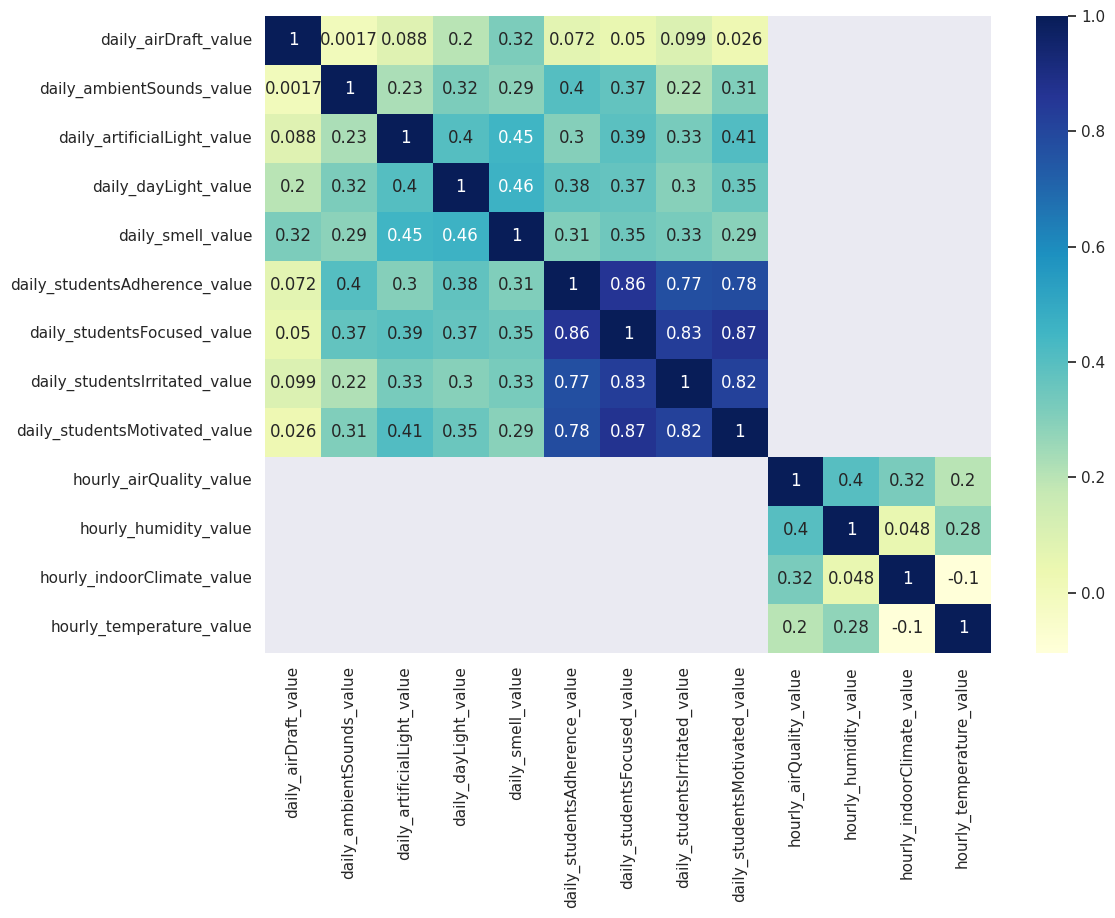

In [7]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
# plotting correlation heatmap
feedback_dataplot = sns.heatmap(feedback_df.corr(), cmap="YlGnBu", annot=True)
feedback_dataplot.get_figure().savefig("../plots/correleation_plot.png",bbox_inches='tight')


Plotting with jitter to vizualise the relationship between student focus and smell

In [8]:
def Jitter(values, jitter):
    n = len(values)
    return np.random.uniform(-jitter, +jitter, n) + values


In [9]:
plt.rcParams["figure.figsize"] = (7,7)

### Plotting affect on daily_studentsFocused_value

Daylight

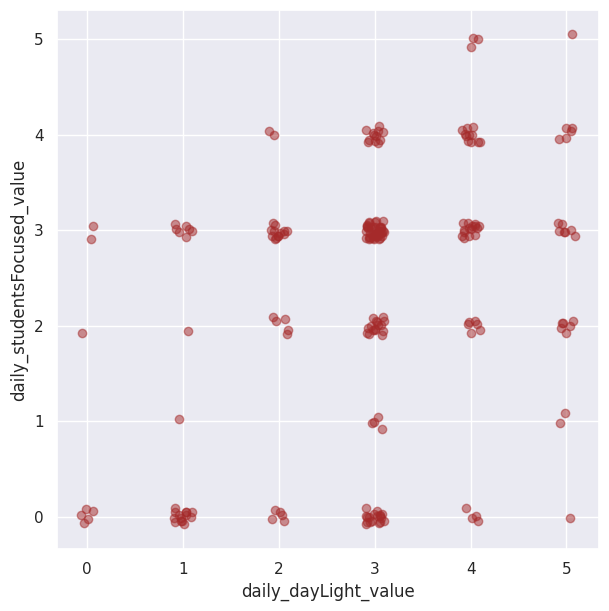

In [10]:
x = feedback_df['daily_dayLight_value']
y = feedback_df['daily_studentsFocused_value']
fig = plt.scatter(Jitter(x,0.1),Jitter(y,0.1), alpha=0.5, color='brown')


plt.ylabel('daily_studentsFocused_value')
plt.xlabel('daily_dayLight_value')
plt.savefig("../plots/daily_studentsFocused_value/daylight.png",bbox_inches='tight')


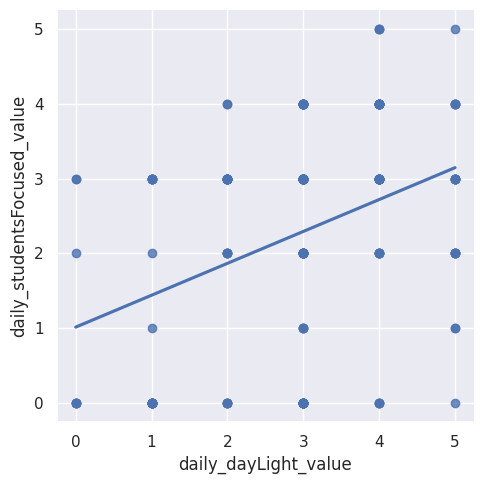

In [11]:
sns.lmplot(x='daily_dayLight_value', y='daily_studentsFocused_value', data=feedback_df, ci=None)

Artificial Light

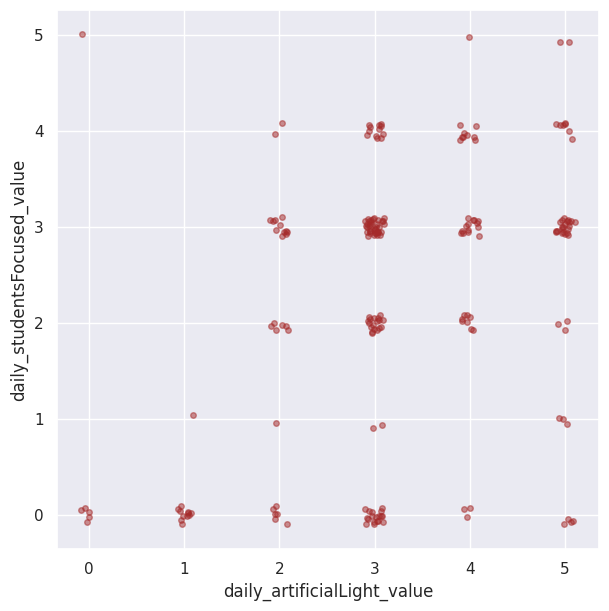

In [12]:

x1 = Jitter(feedback_df['daily_artificialLight_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsFocused_value'],0.1)
plt.plot(x1,y1,'o', alpha=0.5,markersize=4, color='brown')
plt.xlabel('daily_artificialLight_value')
plt.ylabel('daily_studentsFocused_value')
plt.savefig("../plots/daily_studentsFocused_value/artificial_light.png",bbox_inches='tight')


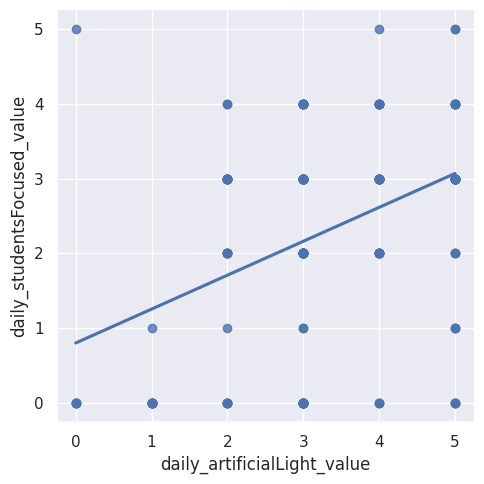

In [13]:
sns.lmplot(x='daily_artificialLight_value', y='daily_studentsFocused_value', data=feedback_df, ci=None)

Smell

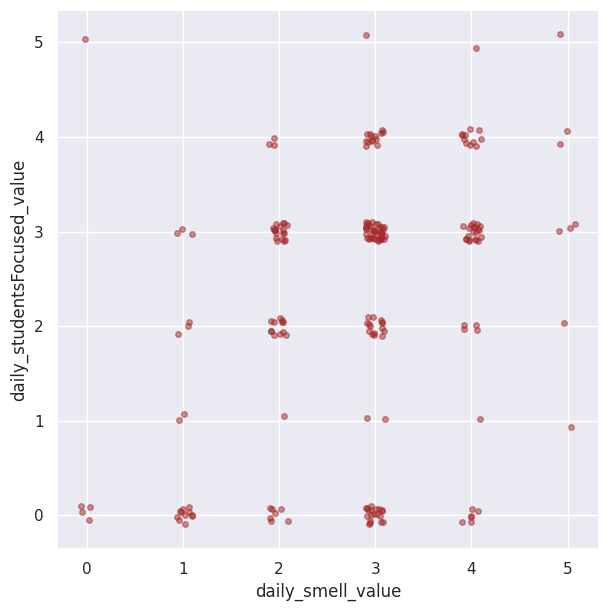

In [14]:
x1 = Jitter(feedback_df['daily_smell_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsFocused_value'],0.1)
plt.plot(x1,y1,'o', alpha=0.5,markersize=4, color='brown')
plt.ylabel('daily_studentsFocused_value')
plt.xlabel('daily_smell_value')
plt.savefig("../plots/daily_studentsFocused_value/smell.png",bbox_inches='tight')

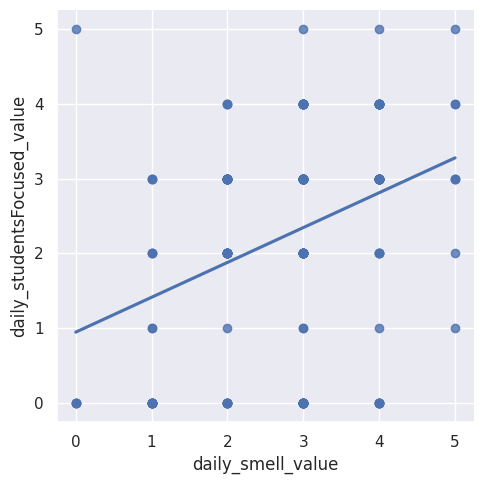

In [15]:
sns.lmplot(x='daily_smell_value', y='daily_studentsFocused_value', data=feedback_df, ci=None)

Ambient sounds

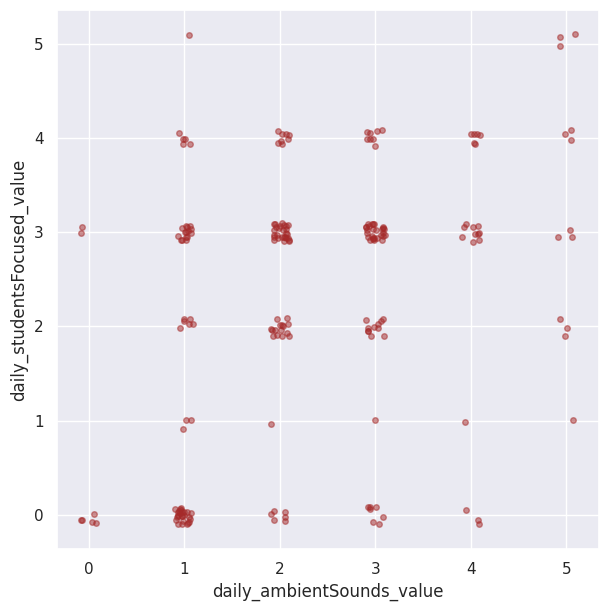

In [16]:
x1 = Jitter(feedback_df['daily_ambientSounds_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsFocused_value'],0.1)
plt.plot(x1,y1,'o', alpha=0.5,markersize=4, color='brown')
plt.ylabel('daily_studentsFocused_value')
plt.xlabel('daily_ambientSounds_value')
plt.savefig("../plots/daily_studentsFocused_value/ambient_sounds.png",bbox_inches='tight')

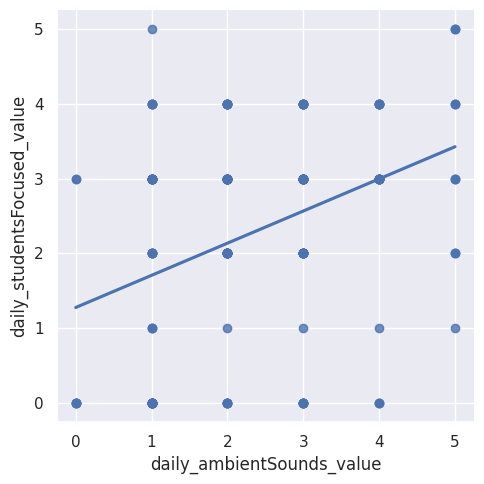

In [17]:
sns.lmplot(x='daily_ambientSounds_value', y='daily_studentsFocused_value', data=feedback_df, ci=None)

### Plotting affect on daily_studentsIrritated_value

Daylight

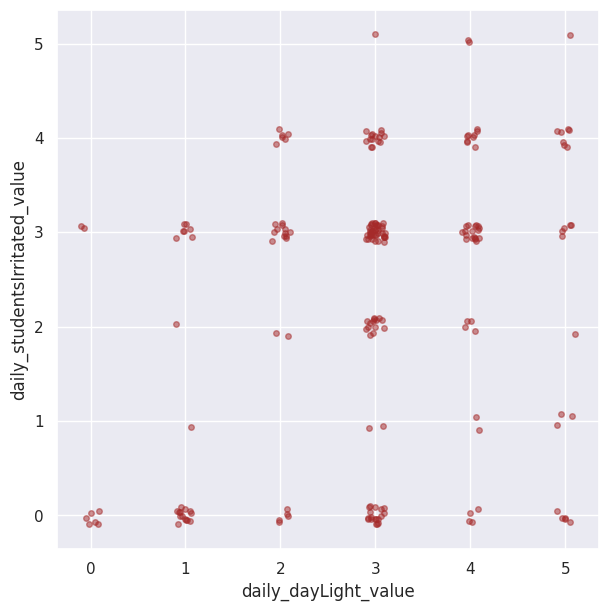

In [18]:
x1 = Jitter(feedback_df['daily_dayLight_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsIrritated_value'],0.1)
plt.plot(x1,y1,'o', alpha=0.5,markersize=4, color='brown')
plt.ylabel('daily_studentsIrritated_value')
plt.xlabel('daily_dayLight_value')
plt.savefig("../plots/daily_studentsIrritated_value/daylight.png",bbox_inches='tight')

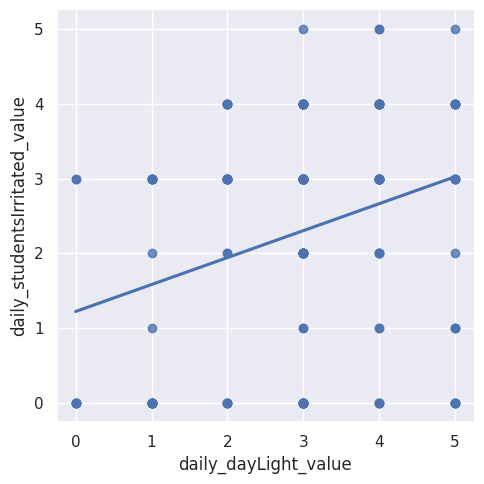

In [19]:
sns.lmplot(x='daily_dayLight_value', y='daily_studentsIrritated_value', data=feedback_df, ci=None)

Artificial Light

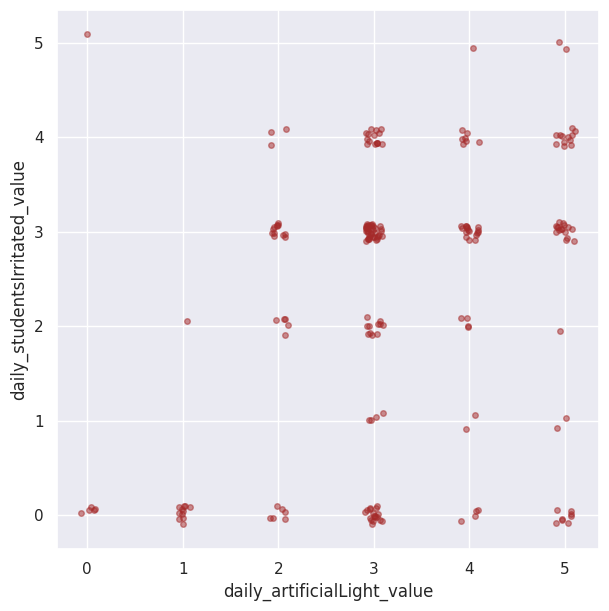

In [20]:

x1 = Jitter(feedback_df['daily_artificialLight_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsIrritated_value'],0.1)
plt.plot(x1,y1,'o', alpha=0.5,markersize=4, color='brown')
plt.xlabel('daily_artificialLight_value')
plt.ylabel('daily_studentsIrritated_value')

plt.savefig("../plots/daily_studentsIrritated_value/artificial_light.png",bbox_inches='tight')

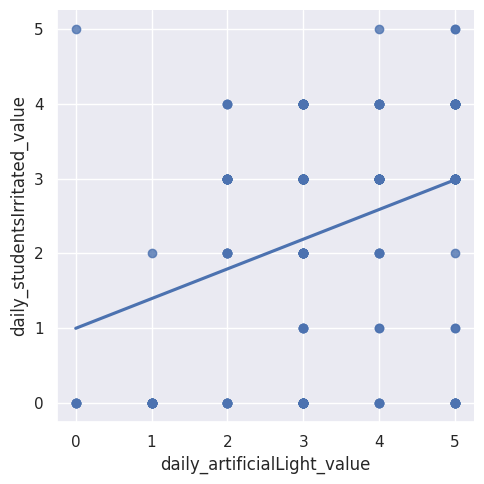

In [38]:
sns.lmplot(x='daily_artificialLight_value', y='daily_studentsIrritated_value', data=feedback_df, ci=None)

Smell

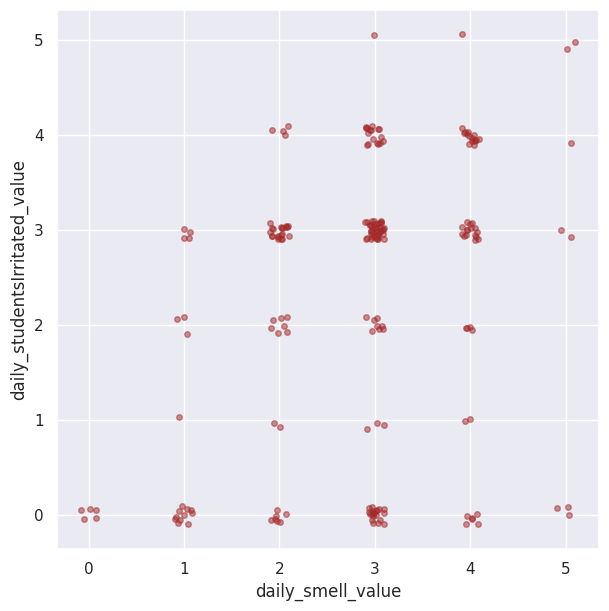

In [21]:
x1 = Jitter(feedback_df['daily_smell_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsIrritated_value'],0.1)
plt.plot(x1,y1,'o', alpha=0.5,markersize=4, color='brown')
plt.ylabel('daily_studentsIrritated_value')
plt.xlabel('daily_smell_value')

plt.savefig("../plots/daily_studentsIrritated_value/smell.png",bbox_inches='tight')

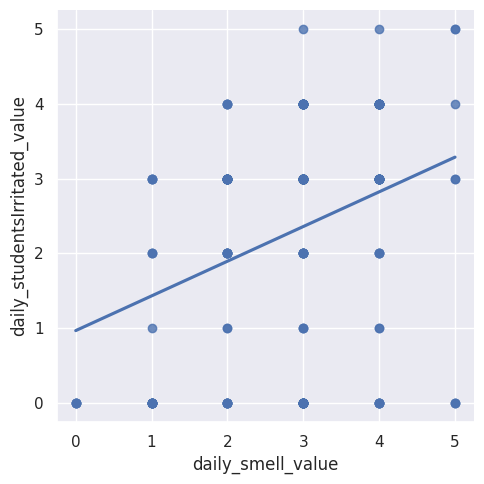

In [37]:
sns.lmplot(x='daily_smell_value', y='daily_studentsIrritated_value', data=feedback_df, ci=None)

Ambient sounds

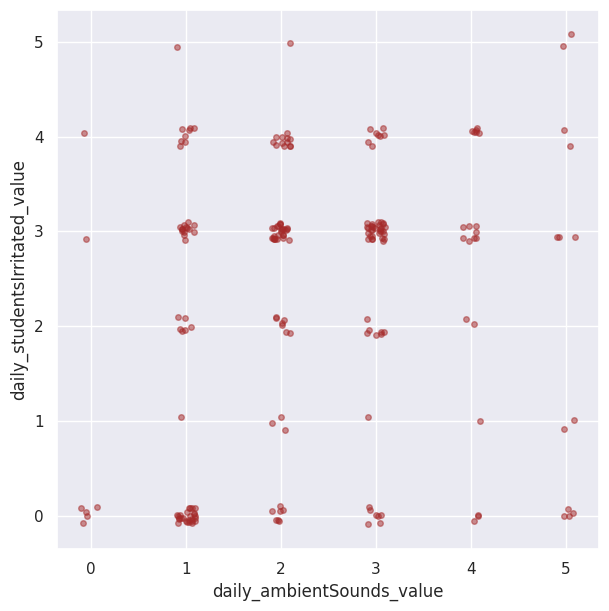

In [22]:
x1 = Jitter(feedback_df['daily_ambientSounds_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsIrritated_value'],0.1)
plt.plot(x1,y1,'o', alpha=0.5,markersize=4, color='brown')
plt.ylabel('daily_studentsIrritated_value')
plt.xlabel('daily_ambientSounds_value')

plt.savefig("../plots/daily_studentsIrritated_value/ambient_sounds.png",bbox_inches='tight')

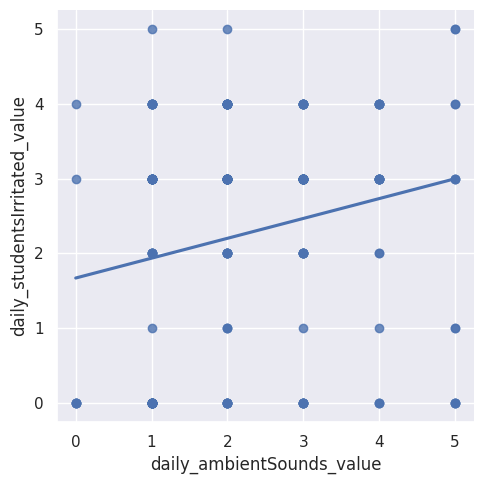

In [39]:
sns.lmplot(x='daily_ambientSounds_value', y='daily_studentsIrritated_value', data=feedback_df, ci=None)

### Plotting affect on daily_studentsAdherence_value

Daylight

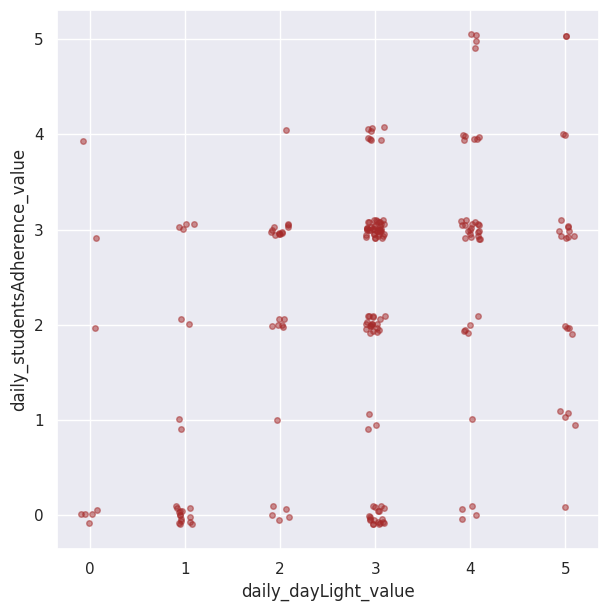

In [23]:
x1 = Jitter(feedback_df['daily_dayLight_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsAdherence_value'],0.1)
plt.plot(x1,y1,'o',markersize=4, color='brown', alpha=0.5)
plt.ylabel('daily_studentsAdherence_value')
plt.xlabel('daily_dayLight_value')

plt.savefig("../plots/daily_studentsAdherence_value/daylight.png",bbox_inches='tight')

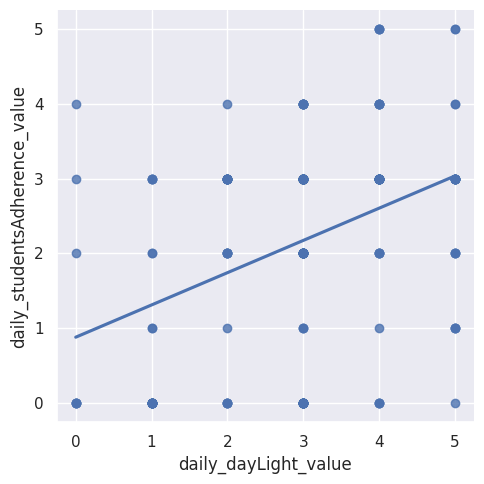

In [40]:
sns.lmplot(x='daily_dayLight_value', y='daily_studentsAdherence_value', data=feedback_df, ci=None)

Artificial Light

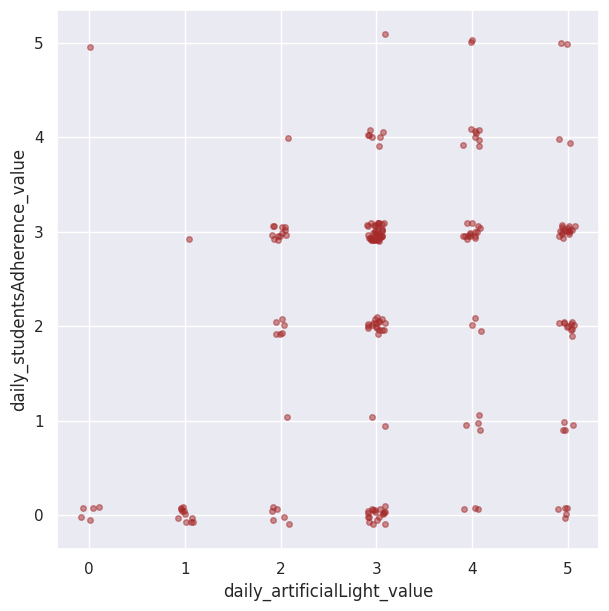

In [24]:

x1 = Jitter(feedback_df['daily_artificialLight_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsAdherence_value'],0.1)
plt.plot(x1,y1,'o',markersize=4, color='brown',alpha=0.5)
plt.xlabel('daily_artificialLight_value')
plt.ylabel('daily_studentsAdherence_value')

plt.savefig("../plots/daily_studentsAdherence_value/artificial_light.png",bbox_inches='tight')

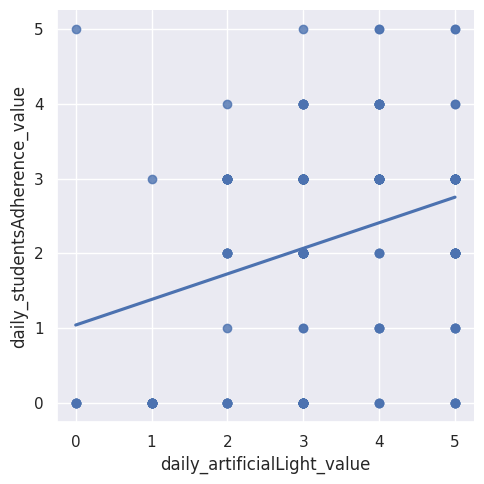

In [41]:
sns.lmplot(x='daily_artificialLight_value', y='daily_studentsAdherence_value', data=feedback_df, ci=None)

Smell

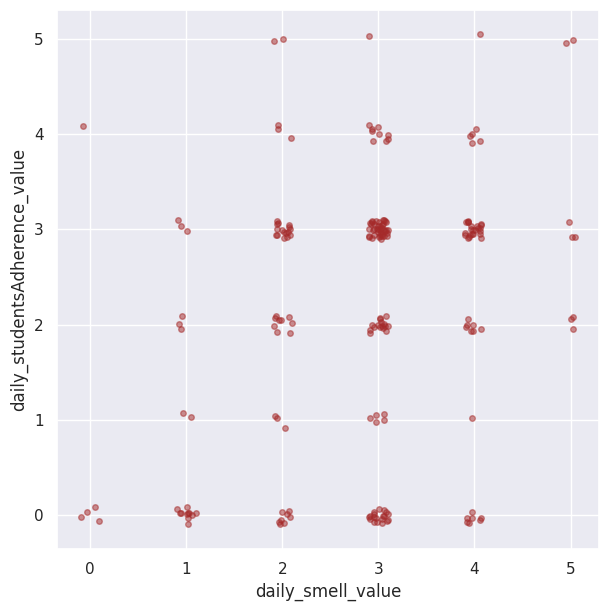

In [25]:
x1 = Jitter(feedback_df['daily_smell_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsAdherence_value'],0.1)
plt.plot(x1,y1,'o',markersize=4, color='brown',alpha=0.5)
plt.ylabel('daily_studentsAdherence_value')
plt.xlabel('daily_smell_value')
plt.savefig("../plots/daily_studentsAdherence_value/smell.png",bbox_inches='tight')

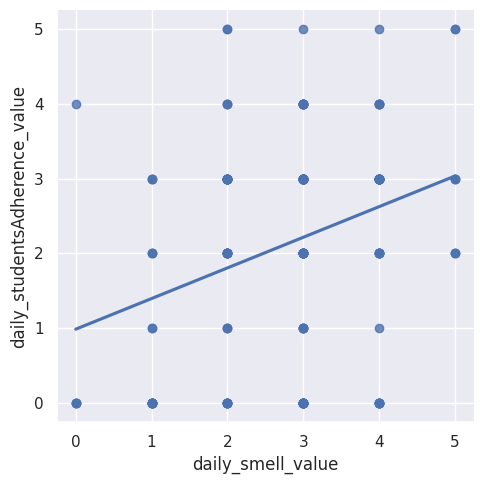

In [42]:
sns.lmplot(x='daily_smell_value', y='daily_studentsAdherence_value', data=feedback_df, ci=None)

Ambient sounds

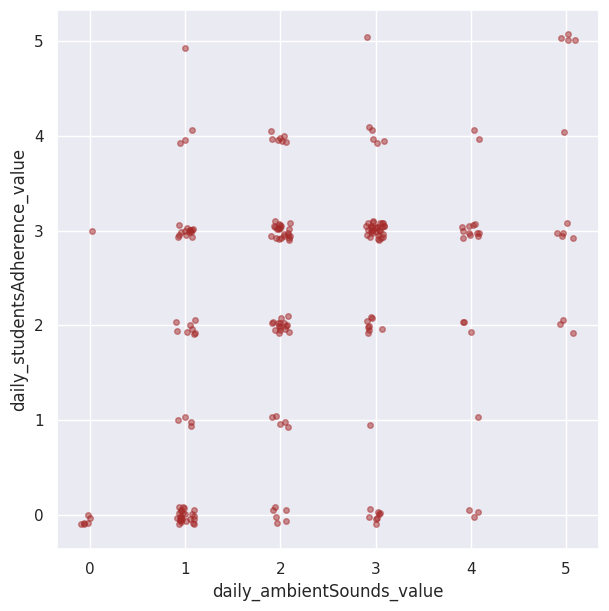

In [26]:
x1 = Jitter(feedback_df['daily_ambientSounds_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsAdherence_value'],0.1)
plt.plot(x1,y1,'o',markersize=4, color='brown',alpha=0.5)
plt.ylabel('daily_studentsAdherence_value')
plt.xlabel('daily_ambientSounds_value')
plt.savefig("../plots/daily_studentsAdherence_value/ambient_sounds.png",bbox_inches='tight')

In [ ]:
sns.lmplot(x='daily_ambientSounds_value', y='daily_studentsAdherence_value', data=feedback_df, ci=None)

### Plotting affect on daily_studentsMotivated_value

Daylight

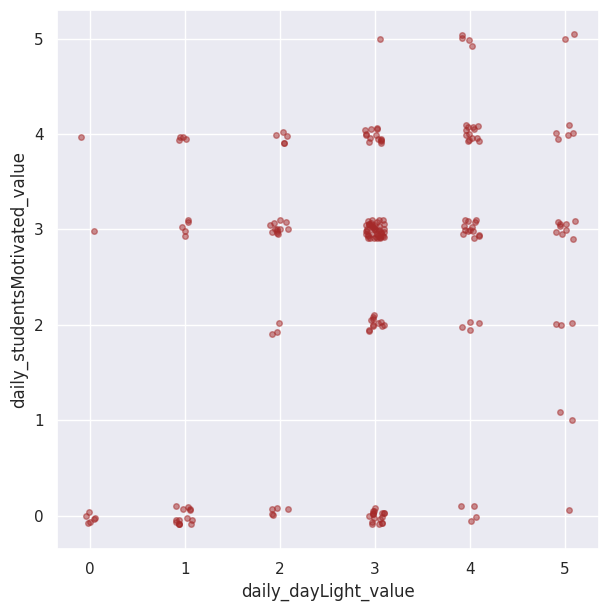

In [27]:
x1 = Jitter(feedback_df['daily_dayLight_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsMotivated_value'],0.1)
plt.plot(x1,y1,'o',markersize=4, color='brown',alpha=0.5)
plt.ylabel('daily_studentsMotivated_value')
plt.xlabel('daily_dayLight_value')
plt.savefig("../plots/daily_studentsMotivated_value/daylight.png",bbox_inches='tight')

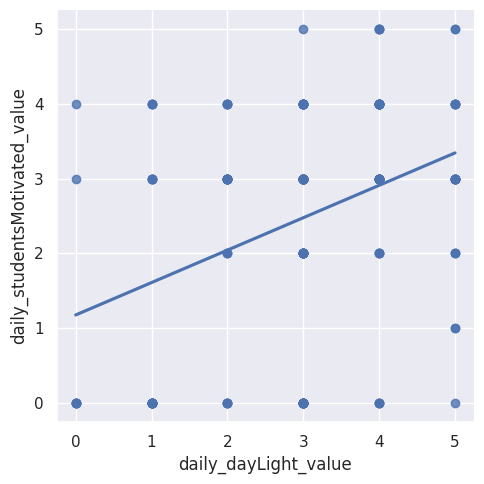

In [43]:
sns.lmplot(x='daily_dayLight_value', y='daily_studentsMotivated_value', data=feedback_df, ci=None)

Artificial Light

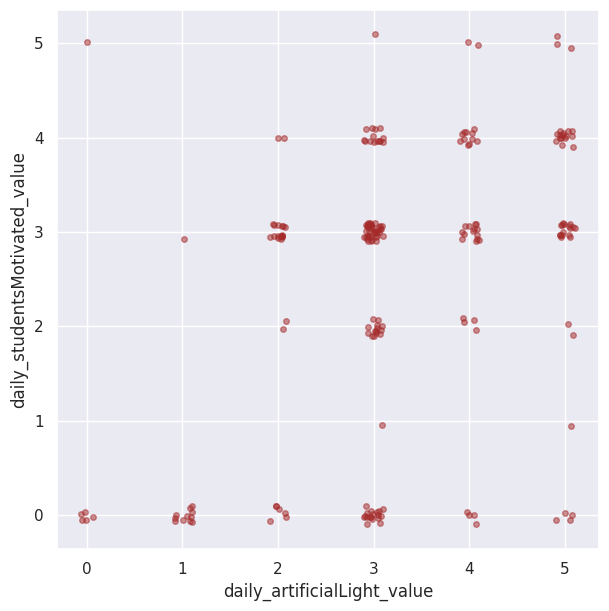

In [28]:

x1 = Jitter(feedback_df['daily_artificialLight_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsMotivated_value'],0.1)
plt.plot(x1,y1,'o',markersize=4, color='brown',alpha=0.5)
plt.xlabel('daily_artificialLight_value')
plt.ylabel('daily_studentsMotivated_value')
plt.savefig("../plots/daily_studentsMotivated_value/artificial_light.png",bbox_inches='tight')

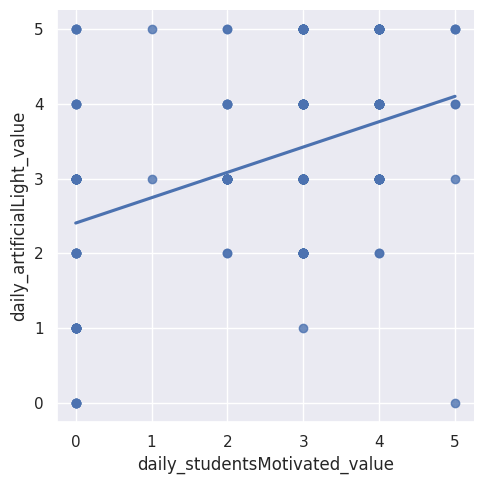

In [44]:
sns.lmplot(x='daily_studentsMotivated_value', y='daily_artificialLight_value', data=feedback_df, ci=None)

Smell

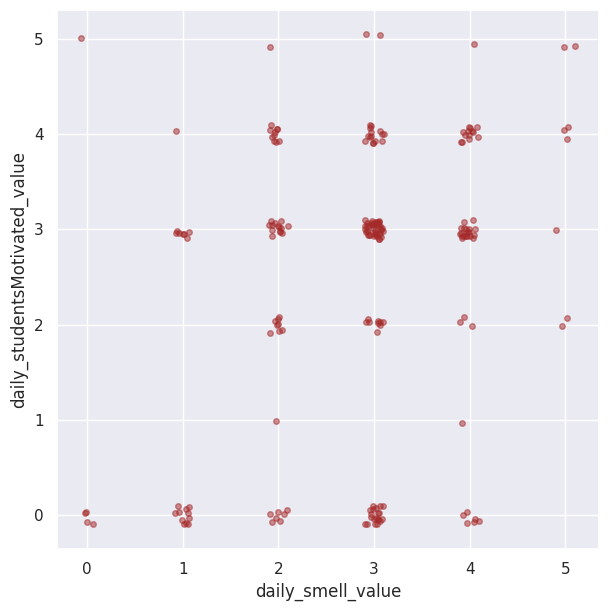

In [29]:
x1 = Jitter(feedback_df['daily_smell_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsMotivated_value'],0.1)
plt.plot(x1,y1,'o',markersize=4, color='brown',alpha=0.5)
plt.ylabel('daily_studentsMotivated_value')
plt.xlabel('daily_smell_value')
plt.savefig("../plots/daily_studentsMotivated_value/smell.png",bbox_inches='tight')

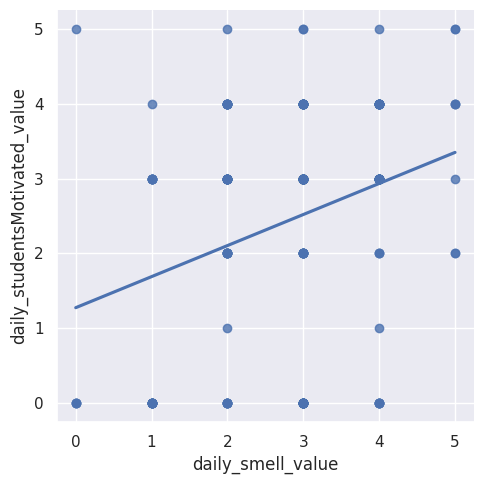

In [45]:
sns.lmplot(x='daily_smell_value', y='daily_studentsMotivated_value', data=feedback_df, ci=None)

Ambient sounds

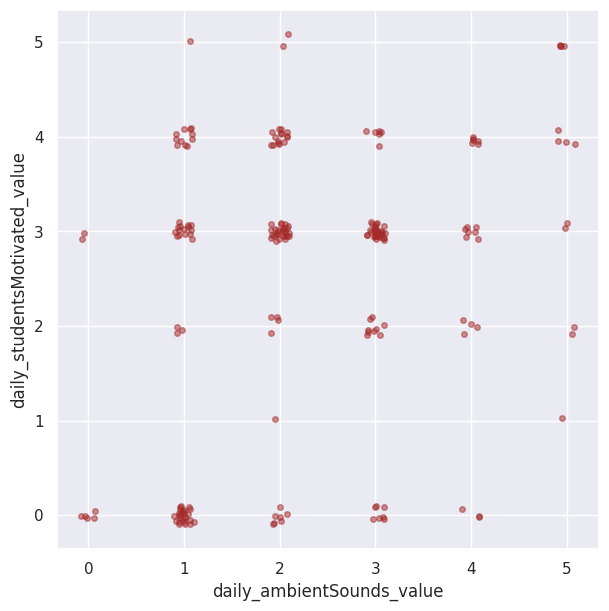

In [30]:
x1 = Jitter(feedback_df['daily_ambientSounds_value'],0.1)
y1 = Jitter(feedback_df['daily_studentsMotivated_value'],0.1)
plt.plot(x1,y1,'o',markersize=4, color='brown',alpha=0.5)
plt.ylabel('daily_studentsMotivated_value')
plt.xlabel('daily_ambientSounds_value')
plt.savefig("../plots/daily_studentsMotivated_value/ambient_sounds.png",bbox_inches='tight')

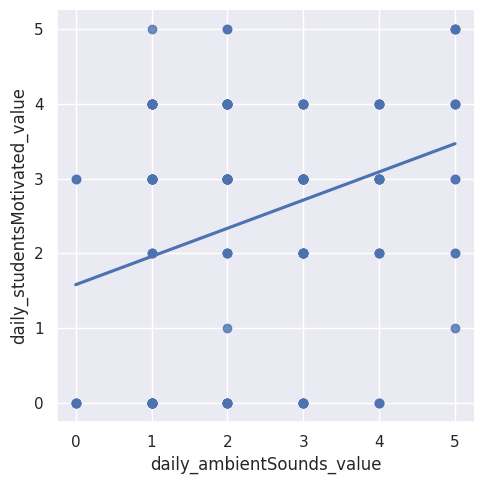

In [46]:
sns.lmplot(x='daily_ambientSounds_value', y='daily_studentsMotivated_value', data=feedback_df, ci=None)

### Teachers' comments

Translating teachers' comments to English

In [31]:
from deep_translator import GoogleTranslator
feedback_df['daily_additionalComment_value_english'] = feedback_df['daily_additionalComment_value'].dropna().apply(GoogleTranslator(source='auto', target='en').translate)

Google translate does a good job, but I added some corrections

Please note that some words like "Lüften" dont really have a definite translation

In [32]:
feedback_df.loc[140,'daily_additionalComment_value_english'] = 'Either the windows are open and it is noisy, or the windows are closed and the air is bad.'
feedback_df.loc[161,'daily_additionalComment_value_english'] = 'Airing!'
feedback_df.loc[268,'daily_additionalComment_value_english'] = 'Temp. only pleasant with the windows open. However, the sunlight then dazzles again and the traffic noise disturbs. With lowered sun protection '
feedback_df.loc[332,'daily_additionalComment_value_english'] = 'Permanently ventilated. Draft comes from the airing, not from the ventilation'
feedback_df.loc[649,'daily_additionalComment_value_english'] = 'Excursion'

Printing English sentences

In [33]:
#for sent in feedback_df['daily_additionalComment_value_english'].dropna().drop_duplicates():
   #print(sent)
print(feedback_df.loc[636,'daily_additionalComment_value_english'])

nan


With windows closed it is often mentioned that it is too warm or too stuffy inside.


In general the teachers' comments were that the room air only feels pleasant when the windows are open but this has problems:
- when windows are open it is often too noisy (traffic noise)
- It could be raining so not possible to open windows

# Hourly Ratings

In [34]:
names_list = ['Temperatur', 'Luftqualität', 'Luftfeuchtigkeit']

def group_data(feedback_df, column):
    feedback_filtered = feedback_df.loc[:, [column]].dropna()
    feedback_filtered['count'] = 1
    grouped_data = feedback_filtered.groupby(by=column).count()
    grouped_data = grouped_data.drop(0, errors='ignore') # Drop ratings with zero value
    grouped_data

    return grouped_data

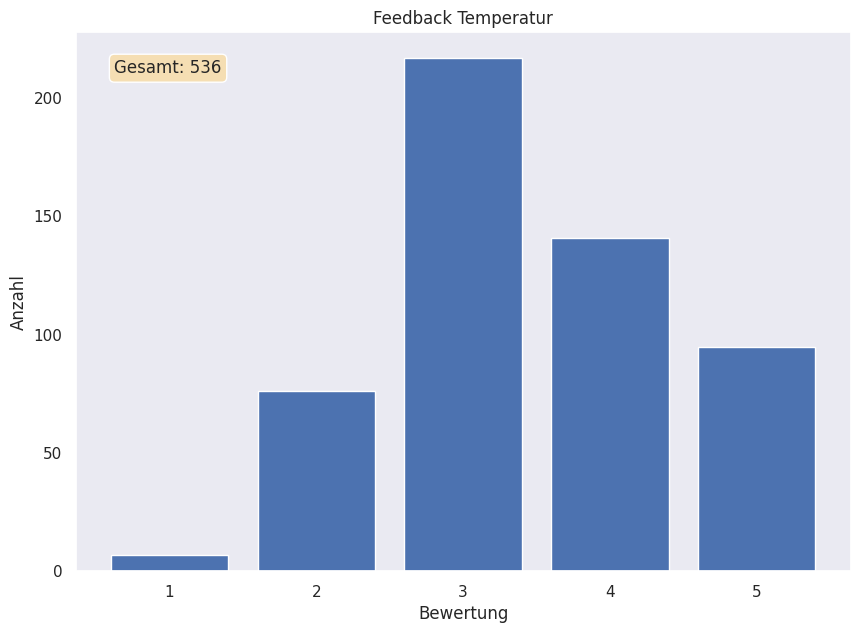

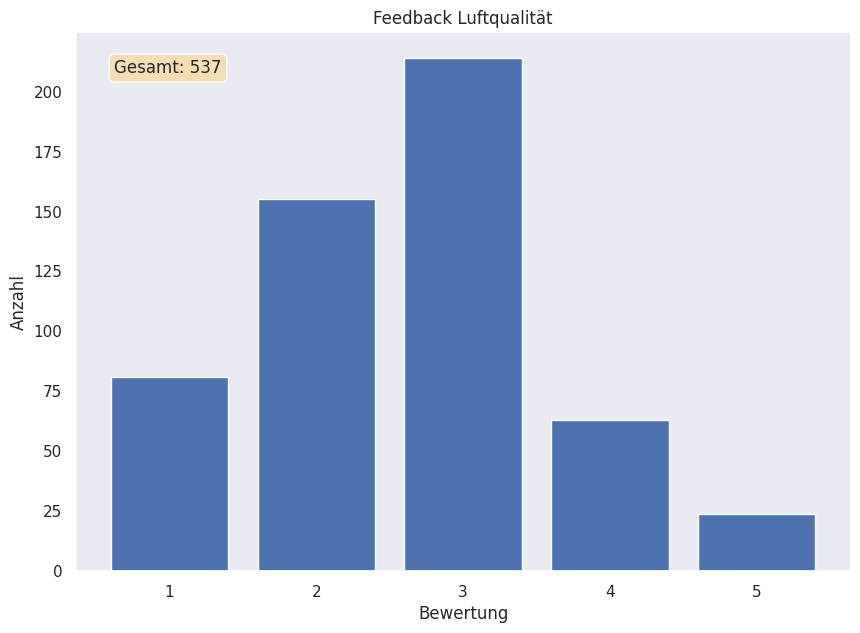

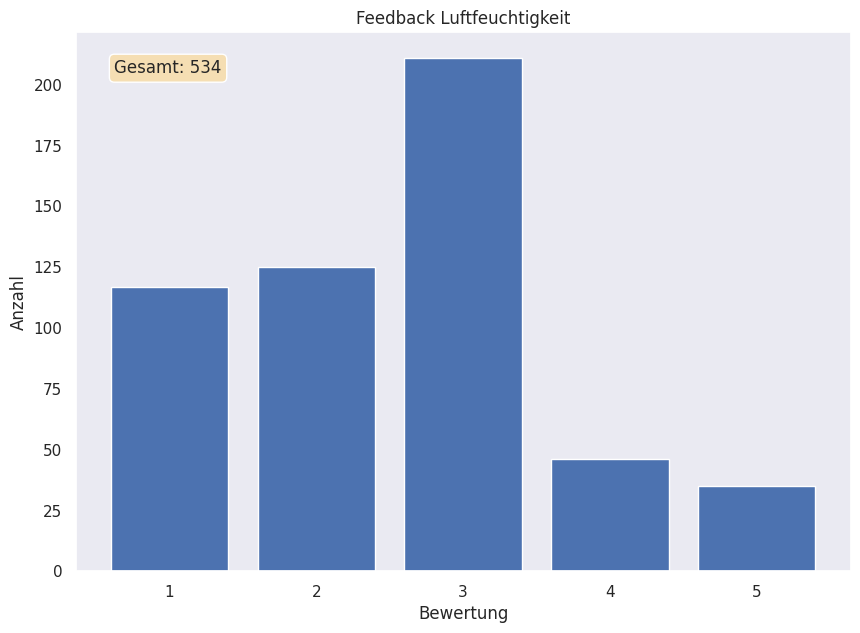

In [35]:
# Total hourly ratings

for column, name in zip(
    ['hourly_temperature_value', 'hourly_indoorClimate_value', 'hourly_humidity_value'],
    ['Temperatur', 'Luftqualität', 'Luftfeuchtigkeit']
    ):
    fig, ax = plt.subplots(figsize=(10, 7))

    grouped_data = group_data(feedback_df, column)

    plt.bar(grouped_data.index, grouped_data['count'])
    plt.title(f"Feedback {name}")
    plt.xlabel("Bewertung")
    plt.ylabel("Anzahl")
    plt.grid()
    ax.set_axisbelow(True)
    props = dict(boxstyle='round', facecolor='wheat')
    ax.text(0.05, 0.95, f"Gesamt: {grouped_data['count'].sum()}", transform=ax.transAxes, verticalalignment='top', bbox=props)

    plt.savefig("../plots/hourly_ratings/Feedback " + name + ".png")
    plt.show()

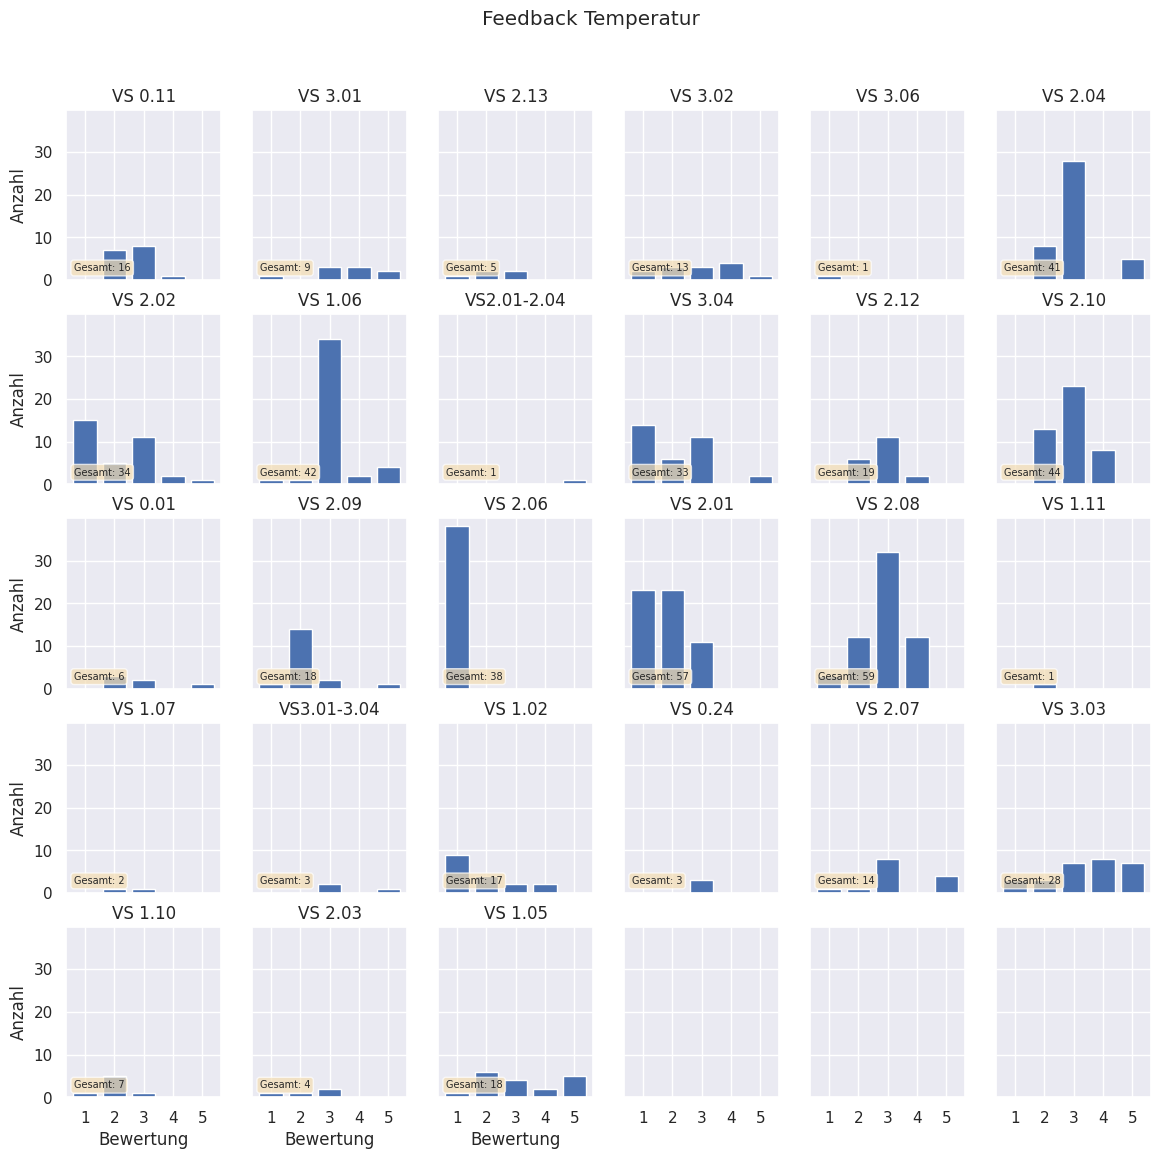

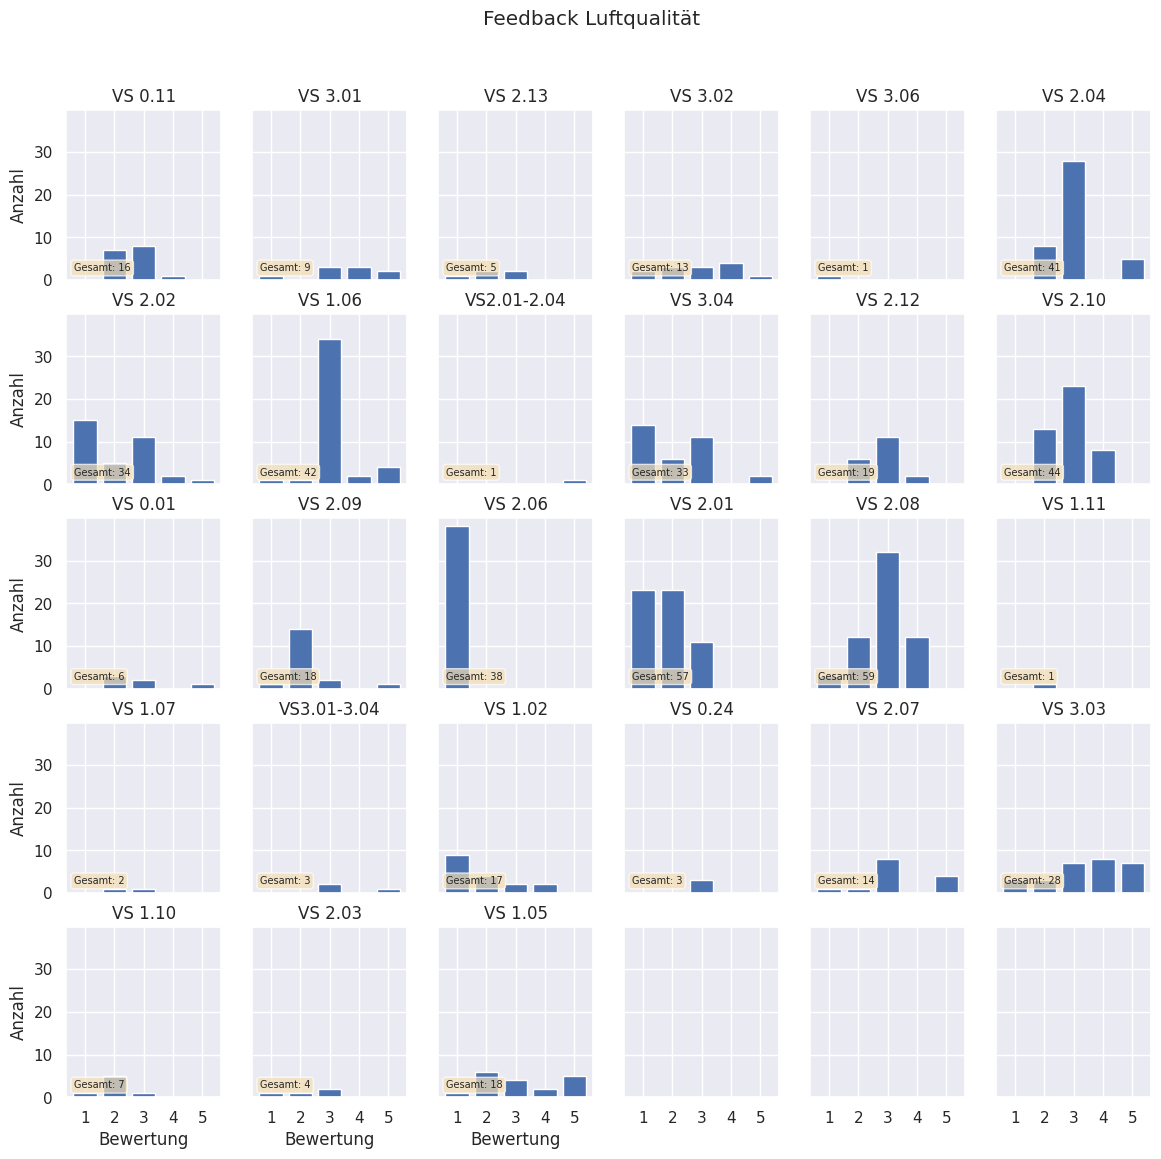

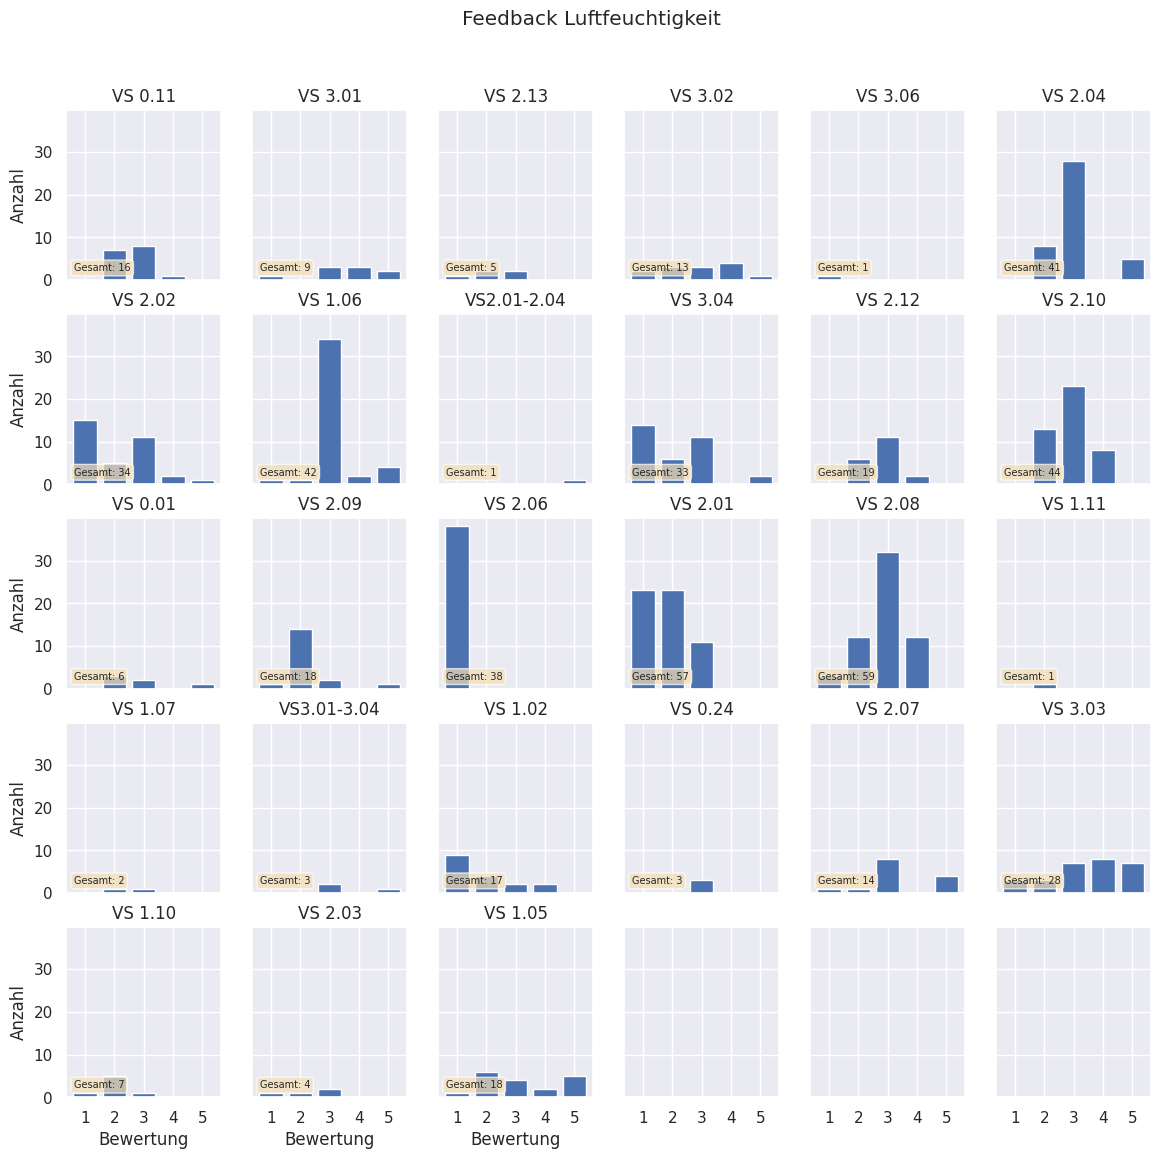

In [36]:
feedback_df_hourly = feedback_df.loc[feedback_df.loc[:, 'type'] == 'hourly']
rooms = list(set(feedback_df_hourly.loc[~feedback_df_hourly['roomName'].isin(['Andreas', 'Stefan']), 'roomName'].values))

n_rows_list = [5, 5, 5]

for name, n_rows in zip(names_list, n_rows_list):
    
    fig, axs = plt.subplots(nrows=n_rows, ncols=6, figsize=(14, n_rows*2.5), sharex=True, sharey=True)
    fig.subplots_adjust(top=0.9)
    fig.add_gridspec(3, hspace=5)
    
    for it, room in enumerate(rooms):
        grouped_data = group_data(feedback_df.loc[feedback_df.loc[:, 'roomName'] == room], column)
        current_row = int(it / 6)
        current_col = it % 6
        ax = axs[current_row, current_col]
        ax.bar(grouped_data.index, grouped_data['count'])
        ax.set_title(room)
        ax.set_xlabel("Bewertung")
        ax.set_ylabel("Anzahl")
        ax.set_xticks([1, 2, 3, 4, 5])
        ax.label_outer()
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.7)
        ax.text(0.05, 0.1, f"Gesamt: {grouped_data['count'].sum()}", transform=ax.transAxes, verticalalignment='top', bbox=props, fontsize=7)

    #plt.tight_layout()
    plt.suptitle(f"Feedback {name}", verticalalignment='top')
    plt.savefig("../plots/hourly_ratings/Feedback Subplots " + name + ".png")
    plt.show()